In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [2]:

data = pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.Outcome.value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [5]:

X = data.drop("Outcome",axis=1).to_numpy()
Y = data[["Outcome"]].to_numpy()

In [6]:
# preprocessing

scaler = StandardScaler()
scaled_X= scaler.fit_transform(X)

In [7]:

#train test

X_train, X_test, y_train, y_test = train_test_split(scaled_X, Y, test_size=0.2, random_state=909,stratify=Y)


In [8]:
pd.DataFrame(y_test).value_counts(normalize=True)

0    0.649351
1    0.350649
Name: proportion, dtype: float64

In [9]:
# logistic regression

log_reg = LogisticRegression()

In [10]:
log_reg.fit(X_train,y_train)

e:\data\ds-mlbatch-07\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [11]:
y_pred = log_reg.predict(X_test)

In [12]:
np.sum(y_test.flatten() == y_pred)/len(y_test.flatten())

0.7597402597402597

# evaluation metrics

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
matrix = confusion_matrix(y_test,y_pred)

In [15]:
matrix

array([[84, 16],
       [21, 33]], dtype=int64)

<Axes: >

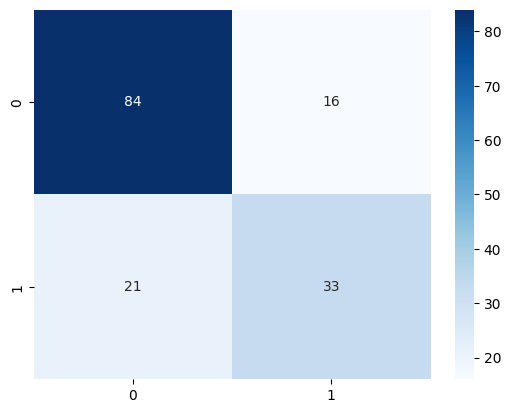

In [16]:
sns.heatmap(matrix,annot=True,cmap="Blues")


# accuracy

In [17]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.7597402597402597

# precision and recall

In [18]:
from sklearn.metrics import  precision_score,recall_score

In [19]:
print("precision score" ,precision_score(y_test,y_pred))
print("recalll score:" ,recall_score(y_test,y_pred))

precision score 0.673469387755102
recalll score: 0.6111111111111112


# f1 score


In [20]:
from sklearn.metrics import f1_score

In [21]:
f1_score(y_pred,y_test)

0.6407766990291262

In [22]:
# summarize report

In [23]:
from sklearn.metrics import classification_report

In [24]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       100
           1       0.67      0.61      0.64        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



# roc curve

In [25]:
from sklearn.metrics import roc_auc_score,roc_curve

In [26]:

y_probs = log_reg.predict_proba(X_test)[:,1]